In [217]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [218]:
df = pd.read_csv("PDFMalware2022_pp.csv", dtype={"Class": int})

In [219]:
df.head()

,Fine.name,pdfsize,metadata.size,pages,xref.Length,title.characters,isEncrypted,embedded.files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
0,0.006549,0.000009,0.000171,1.894025e-06,0.000011,9.470127e-07,9.470127e-07,9.470127e-07,0.000003,0.000004,...,0.000003,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,9.470127e-07,1
1,0.009439,0.000015,0.000213,9.470127e-07,0.000020,7.576102e-06,9.470127e-07,9.470127e-07,0.000003,0.000004,...,0.000003,0.000003,0.000004,0.000003,0.000003,0.000003,0.000018,0.000004,9.470127e-07,1
2,0.003199,0.000005,0.000444,2.841038e-06,0.000013,1.609922e-05,9.470127e-07,9.470127e-07,0.000003,0.000006,...,0.000003,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,9.470127e-07,1
3,0.003891,0.000017,0.000238,1.894025e-06,0.000015,9.470127e-07,9.470127e-07,9.470127e-07,0.000003,0.000004,...,0.000003,0.000004,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,9.470127e-07,1
4,0.008491,0.000008,0.000240,3.788051e-06,0.000016,4.356259e-05,9.470127e-07,9.470127e-07,0.000003,0.000006,...,0.000003,0.000004,0.000003,0.000003,0.000003,0.000003,0.000003,0.000003,9.470127e-07,1


In [220]:
df.describe()

,Fine.name,pdfsize,metadata.size,pages,xref.Length,title.characters,isEncrypted,embedded.files,images,text,...,AA,OpenAction,Acroform,JBIG2Decode,RichMedia,launch,EmbeddedFile,XFA,Colors,Class
count,10023.000000,10023.000000,10023.000000,10023.000000,10023.000000,1.002300e+04,1.002300e+04,1.002300e+04,10023.000000,10023.000000,...,10023.000000,1.002300e+04,1.002300e+04,1.002300e+04,1.002300e+04,1.002300e+04,10023.000000,1.002300e+04,1.002300e+04,10023.000000
mean,0.004748,0.000084,0.000317,0.000004,0.002585,4.970631e-05,9.272656e-07,9.408713e-07,0.000007,0.000004,...,0.000003,3.105971e-06,3.231824e-06,2.847369e-06,2.796442e-06,2.802678e-06,0.000004,2.843589e-06,2.923428e-06,0.554225
std,0.002741,0.000421,0.001483,0.000011,0.017149,1.282989e-03,1.958511e-07,2.434991e-07,0.000013,0.000001,...,0.000002,6.074561e-07,8.941958e-07,7.076832e-07,2.551976e-07,2.555097e-07,0.000004,3.438097e-07,5.509538e-05,0.497076
min,0.000002,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000002,0.000002,...,0.000002,1.894025e-06,1.894025e-06,1.894025e-06,1.894025e-06,1.894025e-06,0.000002,1.894025e-06,0.000000e+00,0.000000
25%,0.002375,0.000009,0.000171,0.000002,0.000012,9.470127e-07,9.470127e-07,9.470127e-07,0.000003,0.000004,...,0.000003,2.841038e-06,2.841038e-06,2.841038e-06,2.841038e-06,2.841038e-06,0.000003,2.841038e-06,9.470127e-07,0.000000
50%,0.004748,0.000035,0.000252,0.000002,0.000021,9.470127e-07,9.470127e-07,9.470127e-07,0.000003,0.000004,...,0.000003,2.841038e-06,2.841038e-06,2.841038e-06,2.841038e-06,2.841038e-06,0.000003,2.841038e-06,9.470127e-07,1.000000
75%,0.007122,0.000077,0.000303,0.000003,0.000074,1.325818e-05,9.470127e-07,9.470127e-07,0.000004,0.000006,...,0.000003,3.788051e-06,3.788051e-06,2.841038e-06,2.841038e-06,2.841038e-06,0.000003,2.841038e-06,9.470127e-07,1.000000
max,0.009495,0.022555,0.073096,0.000564,0.250000,7.291430e-02,4.735064e-06,5.682076e-06,0.000085,0.000006,...,0.000039,8.523115e-06,1.041714e-05,1.609922e-05,7.576102e-06,5.682076e-06,0.000019,7.576102e-06,5.381873e-03,1.000000


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10023 entries, 0 to 10022
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine.name         10023 non-null  float64
 1   pdfsize           10023 non-null  float64
 2   metadata.size     10023 non-null  float64
 3   pages             10023 non-null  float64
 4   xref.Length       10023 non-null  float64
 5   title.characters  10023 non-null  float64
 6   isEncrypted       10023 non-null  float64
 7   embedded.files    10023 non-null  float64
 8   images            10023 non-null  float64
 9   text              10023 non-null  float64
 10  header            10023 non-null  float64
 11  obj               10023 non-null  float64
 12  endobj            10023 non-null  float64
 13  stream            10023 non-null  float64
 14  endstream         10023 non-null  float64
 15  xref              10023 non-null  float64
 16  trailer           10023 non-null  float6

In [222]:
partA, partB = train_test_split(df, test_size=0.9)

<class 'pandas.core.frame.DataFrame'>
Index: 1002 entries, 6078 to 1043
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine.name         1002 non-null   float64
 1   pdfsize           1002 non-null   float64
 2   metadata.size     1002 non-null   float64
 3   pages             1002 non-null   float64
 4   xref.Length       1002 non-null   float64
 5   title.characters  1002 non-null   float64
 6   isEncrypted       1002 non-null   float64
 7   embedded.files    1002 non-null   float64
 8   images            1002 non-null   float64
 9   text              1002 non-null   float64
 10  header            1002 non-null   float64
 11  obj               1002 non-null   float64
 12  endobj            1002 non-null   float64
 13  stream            1002 non-null   float64
 14  endstream         1002 non-null   float64
 15  xref              1002 non-null   float64
 16  trailer           1002 non-null   float64
 1

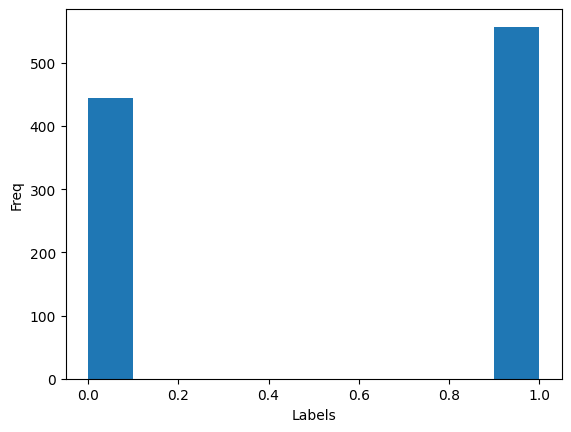

In [223]:
partA.info()
plt.hist(partA['Class'])
plt.xlabel('Labels')
plt.ylabel('Freq')
plt.show()

<class 'pandas.core.frame.DataFrame'>
Index: 9021 entries, 1275 to 9525
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fine.name         9021 non-null   float64
 1   pdfsize           9021 non-null   float64
 2   metadata.size     9021 non-null   float64
 3   pages             9021 non-null   float64
 4   xref.Length       9021 non-null   float64
 5   title.characters  9021 non-null   float64
 6   isEncrypted       9021 non-null   float64
 7   embedded.files    9021 non-null   float64
 8   images            9021 non-null   float64
 9   text              9021 non-null   float64
 10  header            9021 non-null   float64
 11  obj               9021 non-null   float64
 12  endobj            9021 non-null   float64
 13  stream            9021 non-null   float64
 14  endstream         9021 non-null   float64
 15  xref              9021 non-null   float64
 16  trailer           9021 non-null   float64
 1

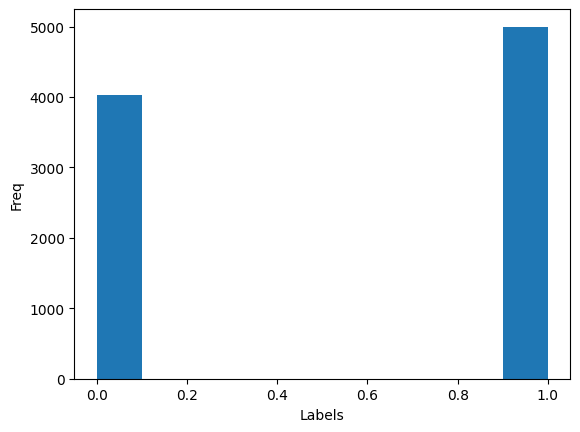

In [224]:
partB.info()
plt.hist(partB['Class'])
plt.xlabel('Labels')
plt.ylabel('Freq')
plt.show()

In [225]:
y = partA["Class"]
x = partA.drop("Class", axis = 1)

In [226]:
X_train, X_teste, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [227]:
k_range = np.arange(1, 30, 2)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv = 5, scoring="accuracy").mean()
    scores.append(score)

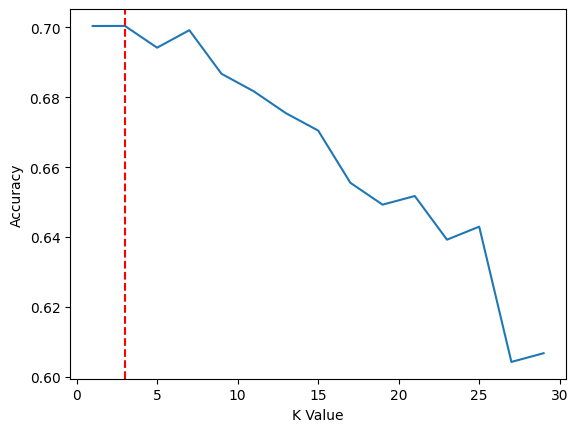

In [228]:
best_k = scores.index(max(scores))

plt.plot(k_range, scores)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.axvline(k_range[best_k], color="red", linestyle="dashed")
plt.show()

In [229]:
grid_params = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    #'metric': ['euclidean', 'manhattan']
    'metric': ['jaccard', 'cityblock', 'russellrao', 'l1', 'sqeuclidean', 'p', 'nan_euclidean', 'hamming', 'braycurtis', 'cosine', 'correlation', 'chebyshev', 'yule', 'manhattan', 'rogerstanimoto', 'euclidean', 'sokalmichener', 'l2', 'canberra', 'dice', 'minkowski', 'infinity']
}

In [230]:
gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 10,
    n_jobs = -1,
    error_score = 'raise'
)

In [231]:
gs_results = gs.fit(x, y)
gs_results.best_params_

In [232]:
y = partB["Class"]
x = partB.drop("Class", axis=1)

In [233]:
clf1 = KNeighborsClassifier(n_neighbors = 7, weights='distance', metric='hamming')
clf1_pred = cross_val_predict(clf1, x, y, cv=10)
conf_clf1 = confusion_matrix(y, clf1_pred)

In [234]:
tn = conf_clf1[0, 0]
tp = conf_clf1[1, 1]
fp = conf_clf1[0, 1]
fn = conf_clf1[1, 0]

print("TN:", tn)
print("TP:", tp)
print("FP:", fp)
print("FN:", fn)
print()
print("Accuracy:", accuracy_score(y, clf1_pred)*100)
print("Precision:", precision_score(y, clf1_pred)*100)
print("Recall:", recall_score(y, clf1_pred)*100)

TN: 3994
TP: 4975
FP: 29
FN: 23

Accuracy: 99.4235672320142
Precision: 99.42046362909672
Recall: 99.53981592637055
